# Flow Network Solver

### General imports

In [1]:
# %pylab
# %run FastFlowNets.py 64 1 0
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sys, os
args = sys.argv
sys.executable

import numpy as np
import copy
from numpy import zeros as zeros
from numpy import ones as ones
from numpy import array as array
from numpy import arange as arange
from numpy import meshgrid as meshgrid
from numpy import dot as dot
from numpy.linalg import inv as inv

import numpy.linalg as la
import numpy.random as rand
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from datetime import datetime

# My functions
import NETfuncs, Constraints, Matrixfuncs, Solve, Statistics, Classes

In [2]:
## for plots and data save

# figure size
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams.update({'font.size': 14})

comp_path = "C:\\Users\\SMR_Admin\\OneDrive - huji.ac.il\\PhD\\Network Simulation repo\\figs and data\\"
# comp_path = "C:\\Users\\roiee\\OneDrive - huji.ac.il\\PhD\\Network Simulation repo\\figs and data\\"

In [3]:
# pip install networkx
# pip install nbconvert

### Roie Larger Network

In [4]:
## Prelims - sizes etc.

NGrid = 6  # lattice dimansion is Ngrid X Ngrid
# input_output_pairs = np.array([[(NGrid+2)*5-1, (NGrid*(NGrid-2)+2)*5-1], 
#                               [(NGrid*(NGrid-1)-1)*5-1, (2*NGrid-1)*5-1]])

# NGrid = 3  # lattice dimansion is Ngrid X Ngrid
# task_type = 'Allostery_one_pair'
task_type = 'Allostery'  # 2 pairs of input and outpus
# task_type = 'XOR'  # 2 inputs and 2 outputs. difference between output nodes encodes the XOR result of the 2 inputs
# row = int(np.floor(np.sqrt(NGrid))-1)  # row (and column) of input and output nodes in the NGrid X NGrid cell array
row = 1
if task_type == 'Allostery' or task_type == 'XOR':
    input_output_pairs = np.array([[(row*NGrid+(row+1))*5-1, (NGrid*(NGrid-(row+1))+(row+1))*5-1], 
                                  [(NGrid*(NGrid-row)-row)*5-1, ((row+1)*NGrid-row)*5-1]])
    if task_type == 'XOR':
        fixed_node_pairs = np.array([[(NGrid*int(np.floor(NGrid/2))+2)*5-1],
                                     [(NGrid*int(np.floor(NGrid/2))+(NGrid-row))*5-1]])
    else:
        fixed_node_pairs = np.array([])
else:
    input_output_pairs = np.array([[(row*NGrid+int(np.ceil(NGrid/2)))*5-1, 
                                    (NGrid*(NGrid-(row+1))+int(np.ceil(NGrid/2)))*5-1], 
                                  [(row*NGrid+int(np.ceil(NGrid/2)))*5-1, 
                                    (NGrid*(NGrid-(row+1))+int(np.ceil(NGrid/2)))*5-1]])
    fixed_node_pairs = np.array([])

print('input output node pairs are:\n' + str(input_output_pairs) +'\n \n' + 'fixed nodes are:\n' 
      + str(fixed_node_pairs) + '\n')

Periodic = False  # flag for lattice periodicity
net_typ = 'Cells'
u_thresh = 1  # threshold to move marbles

if task_type == 'Allostery_one_pair':
    K_scheme = 'propto_current_squared'
    flow_scheme = 'one_shot'  # apply pressure drop from 1 output node and 1 output node, wait till convergence
else:
    K_scheme = 'marbles'
    flow_scheme = 'unidir'  # apply pressure drop only in the regular directions - constrained node = positive, ground = 0
                            # there are 2 input and output pairs, exchange between them
    # flow_scheme = 'taktak'  # apply pressure drop unidir once, meaning 1st input and output pair and then 2nd pair.
                              # then switch ground and constrained nodes to apply oposite dir.
K_type = 'bidir'  # conductivity is the same regardless of flow directions
# K_type = 'flow_dep'  # conductivity depends on flow direction - if into cell then maximal, 
#                      # if out and there is a marble then lower
beta = 10**(-2)
# beta = 0
print('beta is:' + str(beta))

K_max = 1
# K_min = 0.5
K_min = np.array([0.02])
# K_min = np.array([0.999])
# K_min = np.logspace(-4, -0.001, num=30, base=10)
# print('K_min is:')
# for i in K_min:
#     print(i)

# input_p = arange(0.1, 7, 0.16)
# input_p = np.logspace(0.5, 4, num=24, base=10)
input_p = np.array([100])
# print('pressure is:')

iterations = 16

Variabs = Classes.User_variables(NGrid, Periodic, net_typ, u_thresh, input_p, flow_scheme, task_type, K_scheme, K_type, 
                                 iterations, input_output_pairs, fixed_node_pairs, K_max=K_max, K_min=K_min, beta=beta)

input output node pairs are:
[[ 39 129]
 [144  54]]
 
fixed nodes are:
[]

beta is:0.01


In [5]:
## Build Incidence Matrices and vectors of edges

Strctr = Classes.Net_structure()
Strctr.build_incidence(Variabs)

In [6]:
## Initiate Network state and K matrix

State = Classes.Net_state()
State.initiateK(Variabs, Strctr)

NET is ready


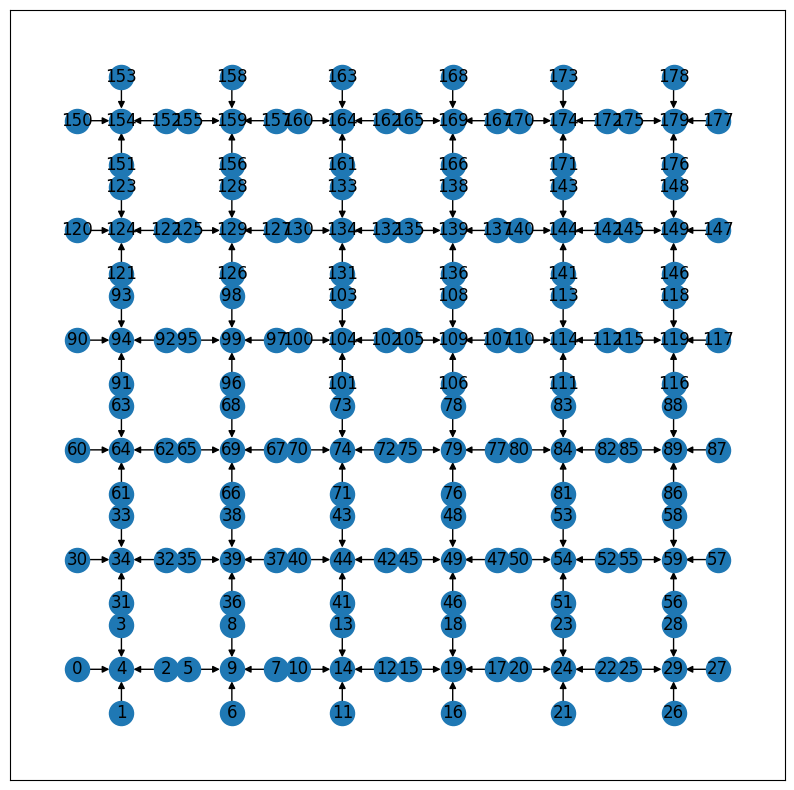

NET is ready


{0: array([-2,  0]),
 1: array([ 0, -2]),
 2: array([2, 0]),
 3: array([0, 2]),
 4: array([0, 0]),
 5: array([3, 0]),
 6: array([ 5, -2]),
 7: array([7, 0]),
 8: array([5, 2]),
 9: array([5, 0]),
 10: array([8, 0]),
 11: array([10, -2]),
 12: array([12,  0]),
 13: array([10,  2]),
 14: array([10,  0]),
 15: array([13,  0]),
 16: array([15, -2]),
 17: array([17,  0]),
 18: array([15,  2]),
 19: array([15,  0]),
 20: array([18,  0]),
 21: array([20, -2]),
 22: array([22,  0]),
 23: array([20,  2]),
 24: array([20,  0]),
 25: array([23,  0]),
 26: array([25, -2]),
 27: array([27,  0]),
 28: array([25,  2]),
 29: array([25,  0]),
 30: array([-2,  5]),
 31: array([0, 3]),
 32: array([2, 5]),
 33: array([0, 7]),
 34: array([0, 5]),
 35: array([3, 5]),
 36: array([5, 3]),
 37: array([7, 5]),
 38: array([5, 7]),
 39: array([5, 5]),
 40: array([8, 5]),
 41: array([10,  3]),
 42: array([12,  5]),
 43: array([10,  7]),
 44: array([10,  5]),
 45: array([13,  5]),
 46: array([15,  3]),
 47: array([

In [7]:
## build network and plot structure

NET = Classes.Networkx_net()
NET.buildNetwork(Strctr)
NET.build_pos_lattice(Variabs)
NETfuncs.plotNetStructure(NET.NET, plot='yes')

In [8]:
# # flow with no marbles

# p = 40  # dummy pressure

# # assign input pressure to Variabs class
# Variabs.assign_input_p(p)

# # assign input pressure to Variabs class
# Variabs.assign_fixed_node_p(p)

# print(Variabs.fixed_node_p)
# print(Variabs.fixed_node_pairs)

# # Identify edges at connections of cells and at boundaries for ease of use
# Strctr.Boundaries_and_connections(Variabs)

# # Set up constraints for whole loop
# Strctr.Setup_constraints(Variabs)

# print(Strctr.InNodeData_full)
# print(Strctr.InNodes_full)

# # Initiate K matrix again, not mandatory, better not doing it actually
# State.initiateK(Variabs, Strctr)

# # Loop - Pose constraints, build constraints matrix, solve flow and update conductivities until convergence,
# #        change constraints and repeat
# State.flow_iterate(Variabs, Strctr, NET, 'no marbles', 'no')
# # State.flow_iterate(Variabs, Strctr, NET, 'w marbles', 'no')

### Main part - loop over many conductivity ratios

In [9]:
# # flow MSE and conductivity Hamming a.f.o input pressure

# # Initiate MSE and Hamming matrices - MSE and Hamming for every iteration step (cols) a.f.o input p (rows)
# MSE_arr = np.zeros([Variabs.iterations, len(K_min)])
# Hamming_arr = np.zeros([Variabs.iterations, len(K_min)])
# power_dissip_arr = np.zeros([Variabs.iterations, len(K_min)])
# convergence_time_vec = np.zeros([len(K_min), ])
# shear_vec = np.zeros([len(K_min), ])  # 
# u_allostery_arr = np.zeros([2, 2, len(K_min)])  # 

# # Identify edges at connections of cells and at boundaries for ease of use
# Strctr.Boundaries_and_connections(Variabs)

# origin = np.array([[0, 0],[0, 0]]) # origin point

# print('started main loop')

# for i, K_min_i in enumerate(K_min):
    
#     # save variables into class
#     Variabs.assign_K_min(K_min_i)
    
#     # Set up constraints for whole loop
#     Strctr.Setup_constraints(Variabs)
    
#     # Initiate K matrix again, not mandatory, better not doing it actually
#     State.initiateK(Variabs, Strctr)
    
#     # Loop - Pose constraints, build constraints matrix, solve flow and update conductivities until convergence,
#     #        change constraints and repeat
#     State.flow_iterate(Variabs, Strctr, NET, 'w marbles', 'no')
    
#     MSE_arr[:, i] = State.MSE
#     Hamming_arr[:, i] = State.Hamming
#     # print(State.power_dissip)
#     power_dissip_arr[:, i] = State.power_dissip
#     convergence_time_vec[i] = State.convergence_time
    
#     State.flow_iterate(Variabs, Strctr, NET, 'allostery test', 'no')
#     print(State.u_final)
    
# #     Variabs.iterations = 1
# #     State.flow_iterate(Variabs, Strctr, NET, 'w marbles', 'yes')
# #     State.flow_iterate(Variabs, Strctr, NET, 'allostery test', 'yes')
# #     print(State.u_final)
    
# #     Variabs.iterations = 2
# #     State.flow_iterate(Variabs, Strctr, NET, 'w marbles', 'yes')
# #     State.flow_iterate(Variabs, Strctr, NET, 'allostery test', 'yes')
# #     print(State.u_final)
    
# #     Variabs.iterations = 3
# #     State.flow_iterate(Variabs, Strctr, NET, 'w marbles', 'no')
# #     State.flow_iterate(Variabs, Strctr, NET, 'allostery test', 'last')
# #     print(State.u_final)
    
# #     Variabs.iterations = iterations
    
#     u_allostery_arr[:,:, i] = State.u_final
#     shear_vec[i] = Statistics.shear_type(State.u_final)
#     print('shear is: ' + str(shear_vec[i]))
    
#     print(str((i+1)*100/len(K_min)) + '% done')

# convergence_time_vec[np.isnan(convergence_time_vec)] = Variabs.iterations

In [10]:
# print(np.mean(State.p))
# np.max(State.p)

In [11]:
# ## Figures

# # prelims for figures
# datenow = datetime.today().strftime('%Y_%m_%d_%H_%M_%S')
# print(datenow)

# # fig 1 - MSE, Hamming and Power dissip. afo p

# fig1, axes1 = plt.subplots(nrows=3)
# # axes.set_color_cycle(['332288', '88CCEE', '44AA99', '117733', '999933', 'DDCC77', 'CC6677', '882255', 'AA4499'])
# # cmap = plt.get_cmap('cool')
# cmap = sns.cubehelix_palette(as_cmap=True)
# colors = [cmap(i) for i in np.linspace(0, 1, len(MSE_arr[0,:]))]
# legend_every = 10

# for i, color in enumerate(colors, start=0):
#     if i % legend_every == 0:
#         axes1[0].plot(range(len(MSE_arr[:,0])), MSE_arr[:,i], color=color, label='K ratio='+str(K_min[i]))
#     else:
#         axes1[0].plot(range(len(MSE_arr[:,0])), MSE_arr[:,i], color=color)
#     axes1[1].plot(range(len(MSE_arr[:,0])), Hamming_arr[:,i], color=color)
#     axes1[2].plot(range(len(MSE_arr[:,0])), power_dissip_arr[:,i]/input_p[0], color=color)
# axes1[0].legend()
# # plt.show()
# axes1[2].set_xlabel('iteration #')
# axes1[0].set_ylabel('flow MSE')
# axes1[1].set_ylabel('Hamming dist.')
# axes1[2].set_ylabel('power')

# ## Save last figure as PNG with proper time
# plt.savefig(comp_path + 'distance_and_P_afo_Kratio_' + "_grid=" + str(NGrid) + "_" + str(datenow) + '.png')

# # fig 2 - # cycles until convergence and tau p

# fig2, axes2 = plt.subplots(nrows=2, figsize=(10,6))
# axes2[0].semilogx(K_min, convergence_time_vec, '.', ms=20, mfc='white', label='# cycles until convergence')
# axes2[0].set_ylabel('# cycles')
# # axes2[1].plot(input_p, theta_vec, '.', ms=20, mfc='white', label='$\\theta$')
# # axes2[1].set_xlabel('input $p$')
# # axes2[1].set_ylabel('$\\theta$')
# axes2[1].semilogx(K_min, shear_vec, '.', ms=20, mfc='white', label='$\\tau$')
# axes2[1].semilogx(K_min, np.zeros([len(K_min),]))
# axes2[1].set_xlabel('$\\frac{K_{min}}{K_{max}}$')
# axes2[1].set_ylabel('$\\tau$')

# ## Save last figure as PNG with proper time
# plt.savefig(comp_path + 'numCycles_and_tau_afo_Kratio_' + "_grid=" + str(NGrid) + "_" + str(datenow) + '.png')

# # fig2 = plt.figure(figsize = (10,4))
# # plt.plot(input_p, convergence_time_vec, '.', ms=20, mfc='white', label='# cycles until convergence')
# # plt.xlabel('input $p$')
# # plt.ylabel('# cycles')
# # # plt.legend(loc='upper right')
# # plt.legend()

# # plt.show()

# # fig3 = plt.figure(figsize = (10,4))
# # plt.plot(input_p, theta_vec, '.', ms=20, mfc='white', label='$\\theta$')
# # plt.xlabel('input $p$')
# # plt.ylabel('$\\theta$')
# # # plt.legend(loc='upper right')
# # plt.legend()

### Main part - loop over many pressures

started main loop
[  0   1   2   3   5   6   7   8  10  11  12  13  15  16  17  18  20  21
  22  23  25  26  27  28  30  31  32  33  35  36  37  38  40  41  42  43
  45  46  47  48  50  51  52  53  55  56  57  58  60  61  62  63  65  66
  67  68  70  71  72  73  75  76  77  78  80  81  82  83  85  86  87  88
  90  91  92  93  95  96  97  98 100 101 102 103 105 106 107 108 110 111
 112 113 115 116 117 118 120 121 122 123 125 126 127 128 130 131 132 133
 135 136 137 138 140 141 142 143 145 146 147 148 150 151 152 153 155 156
 157 158 160 161 162 163 165 166 167 168 170 171 172 173 175 176 177 178
   2   3   7   8  12  13  17  18  22  23  28  32  33  37  38  42  43  47
  48  52  53  58  62  63  67  68  72  73  77  78  82  83  88  92  93  97
  98 102 103 107 108 112 113 118 122 123 127 128 132 133 137 138 142 143
 148 152 157 162 167 172]
[[144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
  162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
  180

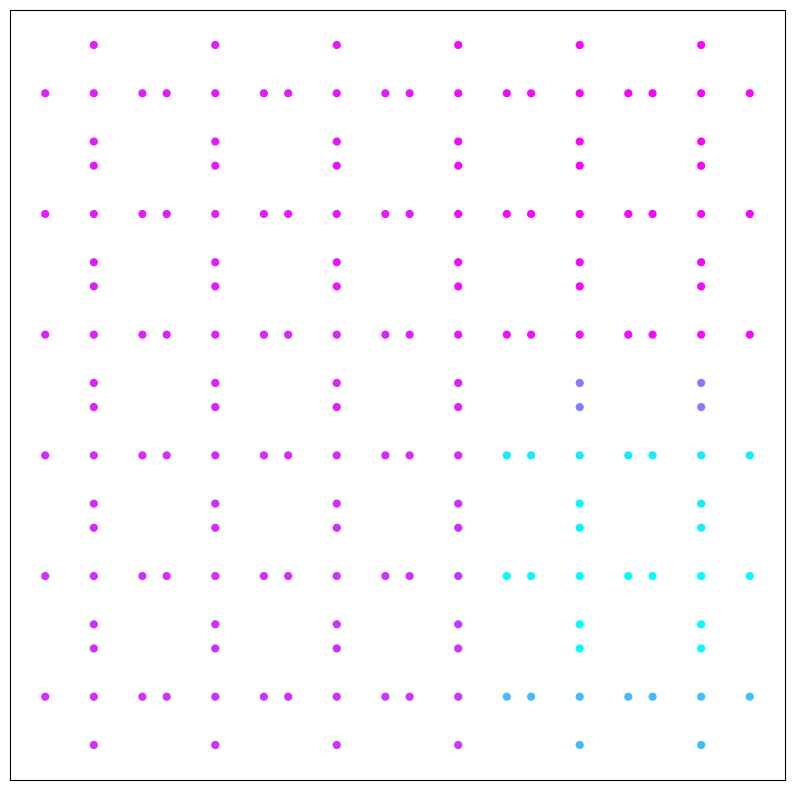

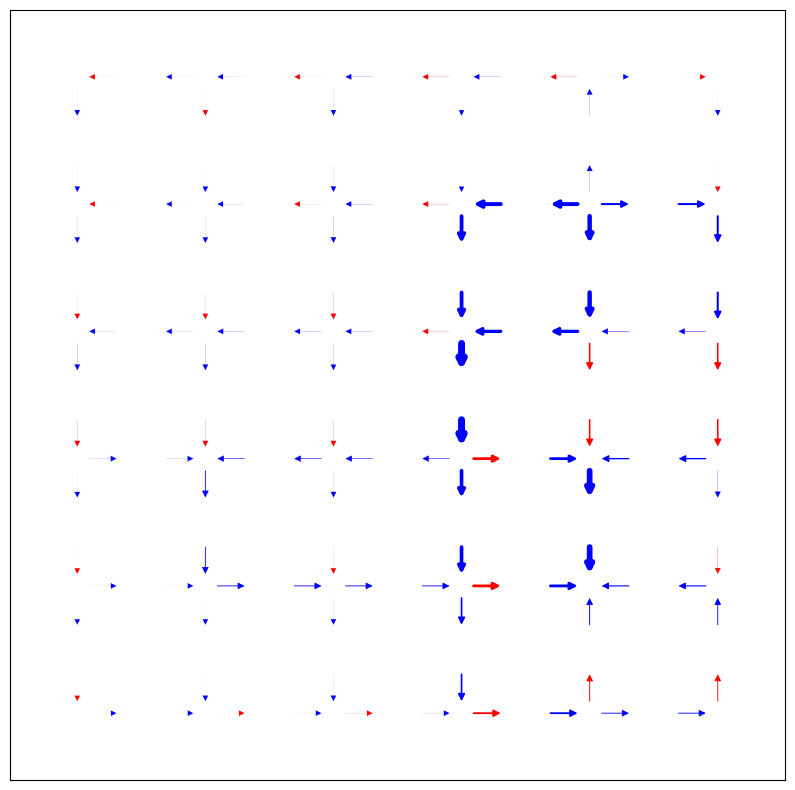

K before iteration:
[1.   1.   1.   0.02 1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.
 0.02 1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02
 1.   1.   1.   1.   1.   1.   1.   0.02 1.   1.   0.02 1.   1.   1.
 1.   1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02
 1.   1.   1.   0.02 1.   1.   0.02 1.   1.   1.   1.   0.02 1.   1.
 1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02
 0.02 1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   1.
 0.02 1.   1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   0.02 1.   1.   0.02 1.   1.   0.02
 1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.
 0.02 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   

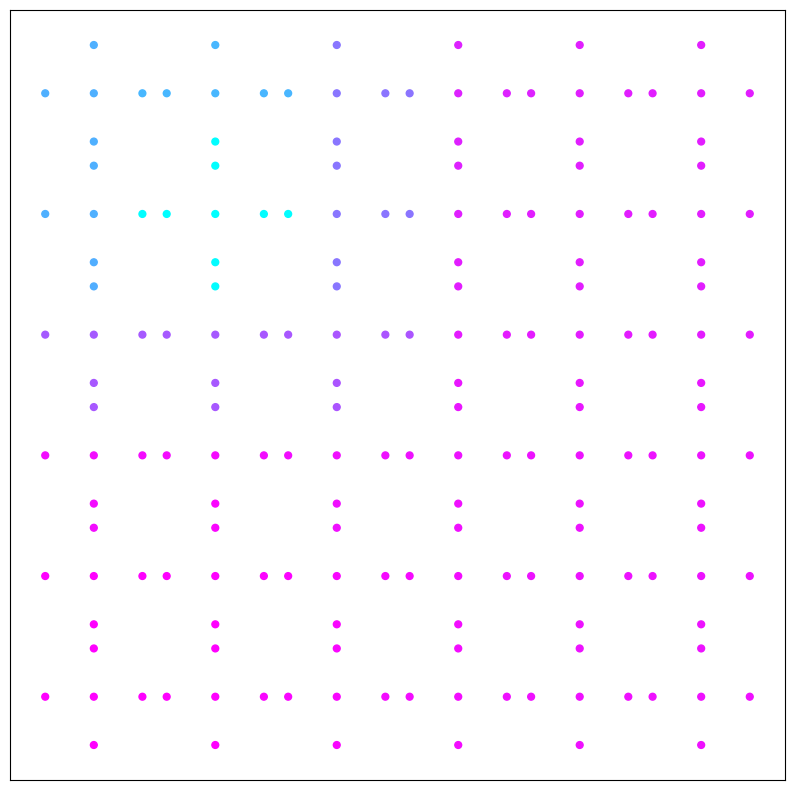

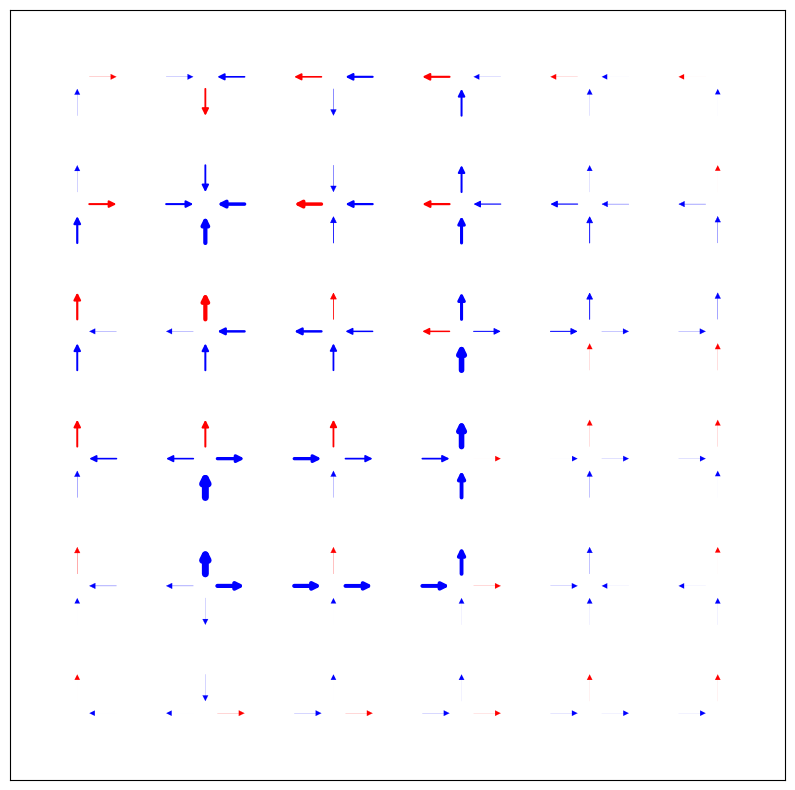

K before iteration:
[1.   1.   1.   0.02 1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.
 0.02 1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02
 1.   1.   1.   1.   1.   1.   1.   0.02 1.   1.   0.02 1.   1.   1.
 1.   1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02
 1.   1.   1.   0.02 1.   1.   0.02 1.   1.   1.   1.   0.02 1.   1.
 1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02
 0.02 1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   1.
 0.02 1.   1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   0.02 1.   1.   0.02 1.   1.   0.02
 1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.
 0.02 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   

In [12]:
# flow MSE and conductivity Hamming a.f.o input pressure

# Initiate MSE and Hamming matrices - MSE and Hamming for every iteration step (cols) a.f.o input p (rows)
MSE_arr = np.zeros([Variabs.iterations, len(input_p)])
Hamming_arr = np.zeros([Variabs.iterations, len(input_p)])
power_dissip_arr = np.zeros([Variabs.iterations, len(input_p)])
convergence_time_vec = np.zeros([len(input_p), ])
# theta_vec = np.zeros([len(input_p), ])
shear_vec = np.zeros([len(input_p), ])  # 
u_allostery_arr = np.zeros([2, 2, len(input_p)])  # 

# Identify edges at connections of cells and at boundaries for ease of use
Strctr.Boundaries_and_connections(Variabs)

origin = np.array([[0, 0],[0, 0]]) # origin point

print('started main loop')

for i, p in enumerate(input_p):
    
    # save variables into class
    Variabs.assign_input_p(p)
    
    # Set up constraints for whole loop
    Strctr.Setup_constraints(Variabs)
    
    # Initiate K matrix again, not mandatory, better not doing it actually
    State.initiateK(Variabs, Strctr, noise='no')
    
    # Loop - Pose constraints, build constraints matrix, solve flow and update conductivities until convergence,
    #        change constraints and repeat
    State.flow_iterate(Variabs, Strctr, NET, 'w marbles', plot='last', savefig='yes')
    
    MSE_arr[:, i] = State.MSE
    Hamming_arr[:, i] = State.Hamming
    # print(State.power_dissip)
    power_dissip_arr[:, i] = State.power_dissip
    convergence_time_vec[i] = State.convergence_time
    
    State.flow_iterate(Variabs, Strctr, NET, 'allostery test', 'no')
    print(State.u_final)
    
#     Variabs.iterations = 1
#     State.flow_iterate(Variabs, Strctr, NET, 'w marbles', 'yes')
#     State.flow_iterate(Variabs, Strctr, NET, 'allostery test', 'yes')
#     print(State.u_final)
    
#     Variabs.iterations = 2
#     State.flow_iterate(Variabs, Strctr, NET, 'w marbles', 'yes')
#     State.flow_iterate(Variabs, Strctr, NET, 'allostery test', 'yes')
#     print(State.u_final)
    
#     Variabs.iterations = 3
#     State.flow_iterate(Variabs, Strctr, NET, 'w marbles', 'no')
#     State.flow_iterate(Variabs, Strctr, NET, 'allostery test', 'last')
#     print(State.u_final)
    
#     Variabs.iterations = iterations
    
    u_allostery_arr[:,:, i] = State.u_final
    shear_vec[i] = Statistics.shear_type(State.u_final)
    print('shear is: ' + str(shear_vec[i]))
    
    print(str((i+1)*100/len(input_p)) + '% done')

convergence_time_vec[np.isnan(convergence_time_vec)] = Variabs.iterations

In [13]:
print(Strctr.EIEJ_plots)
State.u[0:9]

[(0, 4), (1, 4), (2, 4), (3, 4), (5, 9), (6, 9), (7, 9), (8, 9), (10, 14), (11, 14), (12, 14), (13, 14), (15, 19), (16, 19), (17, 19), (18, 19), (20, 24), (21, 24), (22, 24), (23, 24), (25, 29), (26, 29), (27, 29), (28, 29), (30, 34), (31, 34), (32, 34), (33, 34), (35, 39), (36, 39), (37, 39), (38, 39), (40, 44), (41, 44), (42, 44), (43, 44), (45, 49), (46, 49), (47, 49), (48, 49), (50, 54), (51, 54), (52, 54), (53, 54), (55, 59), (56, 59), (57, 59), (58, 59), (60, 64), (61, 64), (62, 64), (63, 64), (65, 69), (66, 69), (67, 69), (68, 69), (70, 74), (71, 74), (72, 74), (73, 74), (75, 79), (76, 79), (77, 79), (78, 79), (80, 84), (81, 84), (82, 84), (83, 84), (85, 89), (86, 89), (87, 89), (88, 89), (90, 94), (91, 94), (92, 94), (93, 94), (95, 99), (96, 99), (97, 99), (98, 99), (100, 104), (101, 104), (102, 104), (103, 104), (105, 109), (106, 109), (107, 109), (108, 109), (110, 114), (111, 114), (112, 114), (113, 114), (115, 119), (116, 119), (117, 119), (118, 119), (120, 124), (121, 124),

array([ 0.        ,  0.        ,  0.00020827, -0.00020827, -0.00020827,
        0.        , -0.00397435,  0.00418262,  0.00397435])

In [14]:
State.K
State.K+beta*State.u**2
State.K ** (-1)

array([ 1.,  1.,  1., 50.,  1.,  1., 50.,  1.,  1.,  1., 50.,  1.,  1.,
        1., 50.,  1.,  1.,  1.,  1., 50.,  1.,  1.,  1., 50.,  1.,  1.,
        1., 50.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 50.,  1.,  1., 50.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 50.,  1.,  1.,  1., 50.,
        1.,  1.,  1., 50.,  1.,  1.,  1., 50.,  1.,  1., 50.,  1.,  1.,
        1.,  1., 50.,  1.,  1.,  1., 50.,  1.,  1.,  1., 50.,  1.,  1.,
        1., 50.,  1.,  1.,  1., 50., 50.,  1.,  1.,  1.,  1., 50.,  1.,
        1.,  1., 50.,  1.,  1.,  1.,  1., 50.,  1.,  1.,  1.,  1.,  1.,
       50.,  1.,  1.,  1., 50.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., 50.,  1.,  1., 50.,  1.,  1., 50.,  1.,  1., 50.,  1.,
        1.,  1., 50.,  1.,  1.,  1., 50.,  1.,  1.,  1., 50.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

K before iteration:
[1.   1.   1.   0.02 1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.
 0.02 1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02
 1.   1.   1.   1.   1.   1.   1.   0.02 1.   1.   0.02 1.   1.   1.
 1.   1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02
 1.   1.   1.   0.02 1.   1.   0.02 1.   1.   1.   1.   0.02 1.   1.
 1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02
 0.02 1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   1.
 0.02 1.   1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   0.02 1.   1.   0.02 1.   1.   0.02
 1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.
 0.02 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   

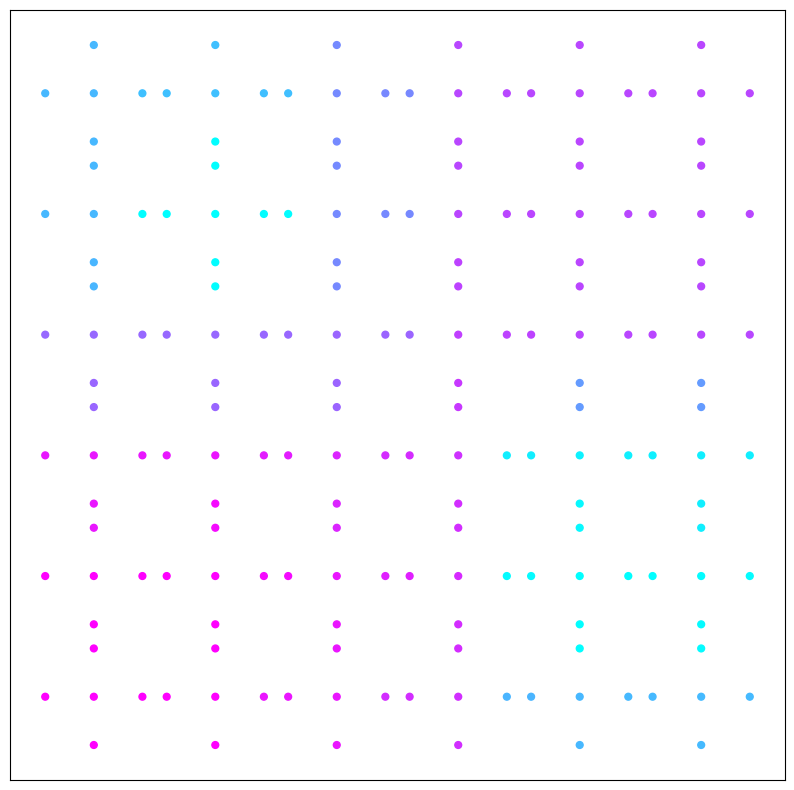

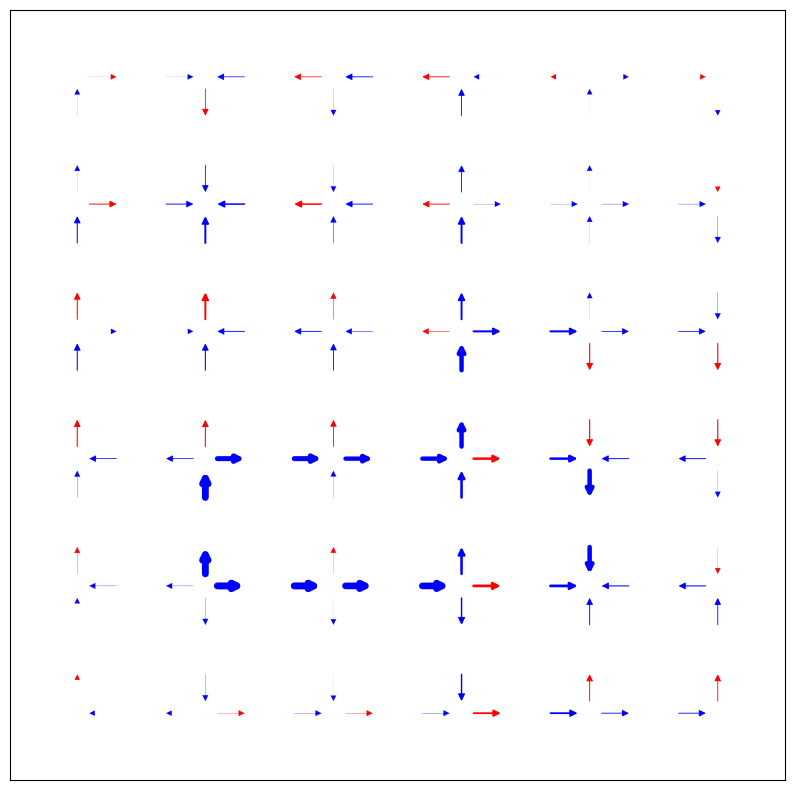

K before iteration:
[1.   1.   1.   0.02 1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.
 0.02 1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02
 1.   1.   1.   1.   1.   1.   1.   0.02 1.   1.   0.02 1.   1.   1.
 1.   1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02
 1.   1.   1.   0.02 1.   1.   0.02 1.   1.   1.   1.   0.02 1.   1.
 1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02
 0.02 1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   1.
 0.02 1.   1.   1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   0.02 1.   1.   0.02 1.   1.   0.02
 1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.   0.02 1.   1.   1.
 0.02 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   

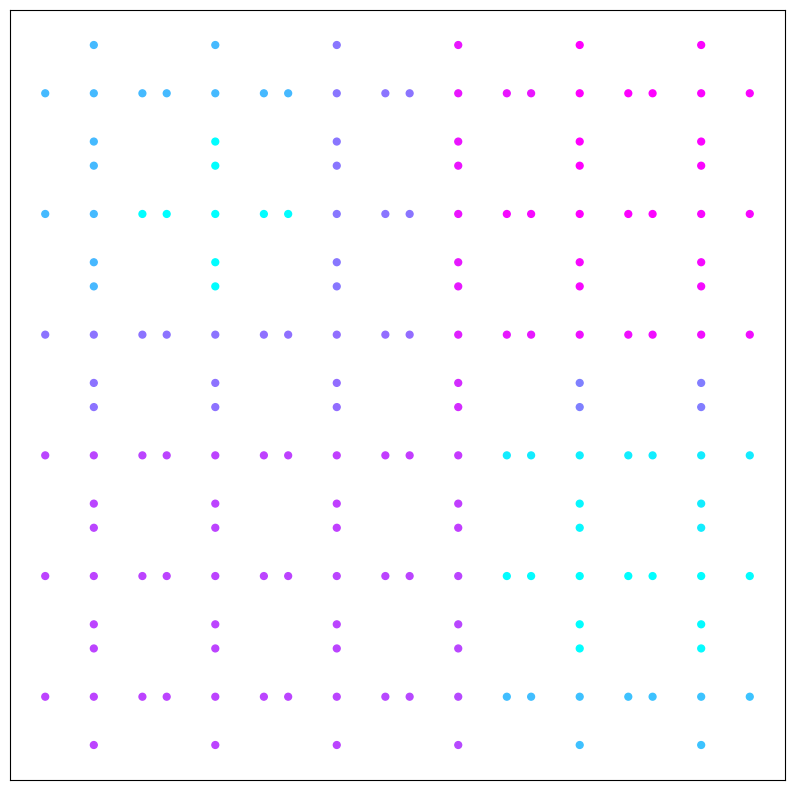

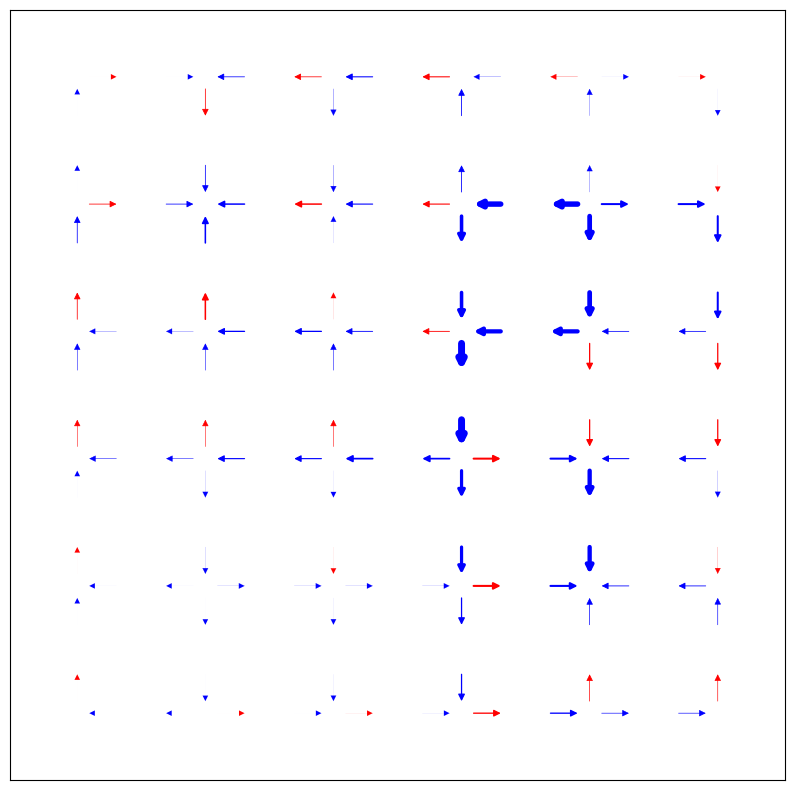

In [15]:
State.flow_iterate(Variabs, Strctr, NET, 'allostery test', 'yes', savefig='yes')

2024_02_26_17_08_33


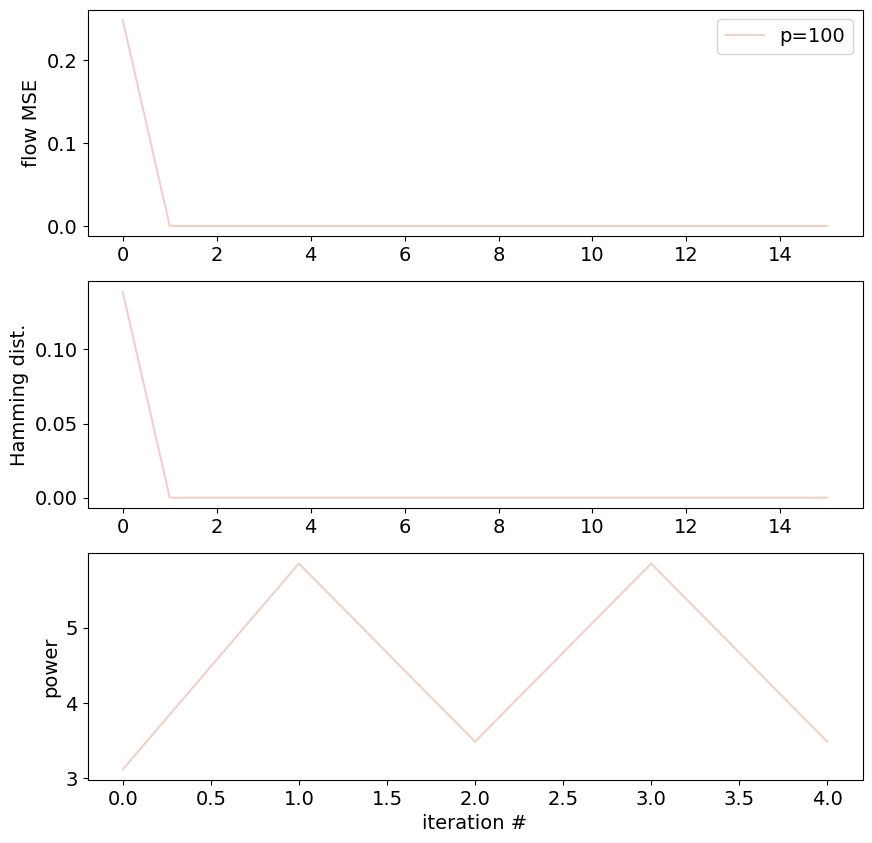

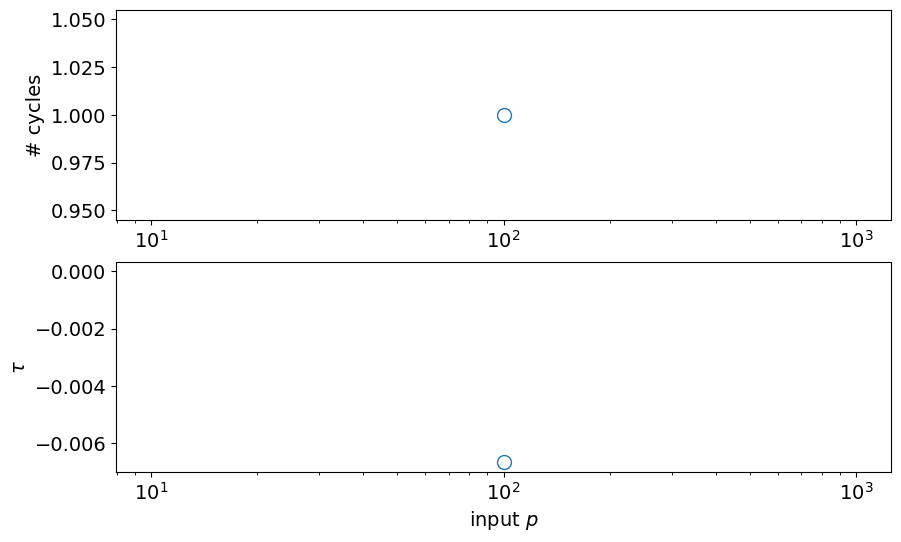

In [16]:
## Figures

# prelims for figures
datenow = datetime.today().strftime('%Y_%m_%d_%H_%M_%S')
print(datenow)

# fig 1 - MSE, Hamming and Power dissip. afo p

fig1, axes1 = plt.subplots(nrows=3)
# axes.set_color_cycle(['332288', '88CCEE', '44AA99', '117733', '999933', 'DDCC77', 'CC6677', '882255', 'AA4499'])
# cmap = plt.get_cmap('cool')
cmap = sns.cubehelix_palette(as_cmap=True)
colors = [cmap(i) for i in np.linspace(0, 1, len(MSE_arr[0,:]))]
legend_every = 10

for i, color in enumerate(colors, start=0):
    if i % legend_every == 0:
        axes1[0].plot(range(len(MSE_arr[:,0])), MSE_arr[:,i], color=color, label='p='+str(input_p[i]))
    else:
        axes1[0].plot(range(len(MSE_arr[:,0])), MSE_arr[:,i], color=color)
    axes1[1].plot(range(len(MSE_arr[:,0])), Hamming_arr[:,i], color=color)
    axes1[2].plot(range(len(MSE_arr[:,0])), power_dissip_arr[:,i]/input_p[i], color=color)
axes1[0].legend()
# plt.show()
axes1[2].set_xlabel('iteration #')
axes1[0].set_ylabel('flow MSE')
axes1[1].set_ylabel('Hamming dist.')
axes1[2].set_ylabel('power')

## Save last figure as PNG with proper time
plt.savefig(comp_path + 'distance_and_P_afo_p_' + "_grid=" + str(NGrid) + "_" + str(datenow) + '.png')

# fig 2 - # cycles until convergence and tau p

fig2, axes2 = plt.subplots(nrows=2, figsize=(10,6))
axes2[0].semilogx(input_p, convergence_time_vec, '.', ms=20, mfc='white', label='# cycles until convergence')
axes2[0].set_ylabel('# cycles')
# axes2[1].plot(input_p, theta_vec, '.', ms=20, mfc='white', label='$\\theta$')
# axes2[1].set_xlabel('input $p$')
# axes2[1].set_ylabel('$\\theta$')
axes2[1].semilogx(input_p, shear_vec, '.', ms=20, mfc='white', label='$\\tau$')
axes2[1].semilogx(input_p, np.zeros([len(input_p),]))
axes2[1].set_xlabel('input $p$')
axes2[1].set_ylabel('$\\tau$')

## Save last figure as PNG with proper time
plt.savefig(comp_path + 'numCycles_and_tau_afo_p_' + "_grid=" + str(NGrid) + "_" + str(datenow) + '.png')

# fig2 = plt.figure(figsize = (10,4))
# plt.plot(input_p, convergence_time_vec, '.', ms=20, mfc='white', label='# cycles until convergence')
# plt.xlabel('input $p$')
# plt.ylabel('# cycles')
# # plt.legend(loc='upper right')
# plt.legend()

# plt.show()

# fig3 = plt.figure(figsize = (10,4))
# plt.plot(input_p, theta_vec, '.', ms=20, mfc='white', label='$\\theta$')
# plt.xlabel('input $p$')
# plt.ylabel('$\\theta$')
# # plt.legend(loc='upper right')
# plt.legend()

In [17]:
print(np.max(State.p))
print(np.min(State.p))
State.p

99.99999999999997
-8.693035182013055


array([[ 7.35327239e+01],
       [ 7.35327239e+01],
       [ 7.35329322e+01],
       [ 7.35223104e+01],
       [ 7.35327239e+01],
       [ 7.35329322e+01],
       [ 7.35331404e+01],
       [ 7.33344229e+01],
       [ 7.35373231e+01],
       [ 7.35331404e+01],
       [ 7.33344229e+01],
       [ 7.33304486e+01],
       [ 7.15062797e+01],
       [ 7.33629576e+01],
       [ 7.33304486e+01],
       [ 7.15062797e+01],
       [ 7.14697964e+01],
       [ 2.54157236e+01],
       [ 7.23543944e+01],
       [ 7.14697964e+01],
       [ 2.54157236e+01],
       [ 2.44946421e+01],
       [ 2.40538478e+01],
       [ 4.80287101e-01],
       [ 2.44946421e+01],
       [ 2.40538478e+01],
       [ 2.36130534e+01],
       [ 2.36130534e+01],
       [ 1.57333568e+00],
       [ 2.36130534e+01],
       [ 7.35221022e+01],
       [ 7.35223104e+01],
       [ 7.35318039e+01],
       [ 7.30266006e+01],
       [ 7.35221022e+01],
       [ 7.35318039e+01],
       [ 7.35373231e+01],
       [ 7.34684861e+01],
       [ 7.3

In [18]:
# Save inportant data as CSV

# import pandas as pd 

datenow = datetime.today().strftime('%Y_%m_%d_%H_%M_%S')
print(datenow)

# df1 = pd.DataFrame(u_allostery_arr)
# print('C:\\Users\\SMR_Admin\\OneDrive - huji.ac.il\\PhD\\Network Simulation repo\\Network\\u_allostery' + str(datenow) + '.csv')
# df1.to_csv("C:\\Users\\SMR_Admin\\OneDrive - huji.ac.il\\PhD\\Network Simulation repo\\Network\\u_allostery" + str(datenow) + ".csv")
df2 = pd.DataFrame(np.array([K_min, convergence_time_vec, shear_vec]))
df2.to_csv(comp_path + str(datenow) + "_grid=" + str(NGrid) + "_shear_vec.csv")

2024_02_26_17_08_35


In [19]:
## Not in use - keep just in case I can't recover from Git

In [20]:
# if Variabs.flow_scheme == 'taktak':
#     MSE = Statistics.flow_MSE(State.u_all, 4)
#     Hamming = Statistics.K_Hamming(State.K_cells, 4)
# elif Variabs.flow_scheme == 'unidir':
#     MSE = Statistics.flow_MSE(State.u_all, 2)
#     Hamming = Statistics.K_Hamming(State.K_cells, 2)
# print(MSE)
# print(Hamming)

# plt.plot(MSE)
# plt.show()

# plt.plot(Hamming)
# plt.show()

In [21]:
# u_final_cond = State.u_final

# print('pushing from ' + str(Strctr.Nodes_full[0]))
# print('out of edge ' + str(Strctr.GroundNodes_full[0]) + ' flows ' + str(u_final_Cond[0,0]))
# print('and out of edge ' + str(Strctr.GroundNodes_full[1]) + ' flows ' + str(u_final_Cond[0,1]))
# print('pushing from ' + str(Strctr.Nodes_full[1]))
# print('out of edge ' + str(Strctr.GroundNodes_full[0]) + ' flows ' + str(u_final_Cond[1,0]))
# print('and out of edge ' + str(Strctr.GroundNodes_full[1]) + ' flows ' + str(u_final_Cond[1,1]))

### Roie Very Simple Net

A net of a single cross 

<div>
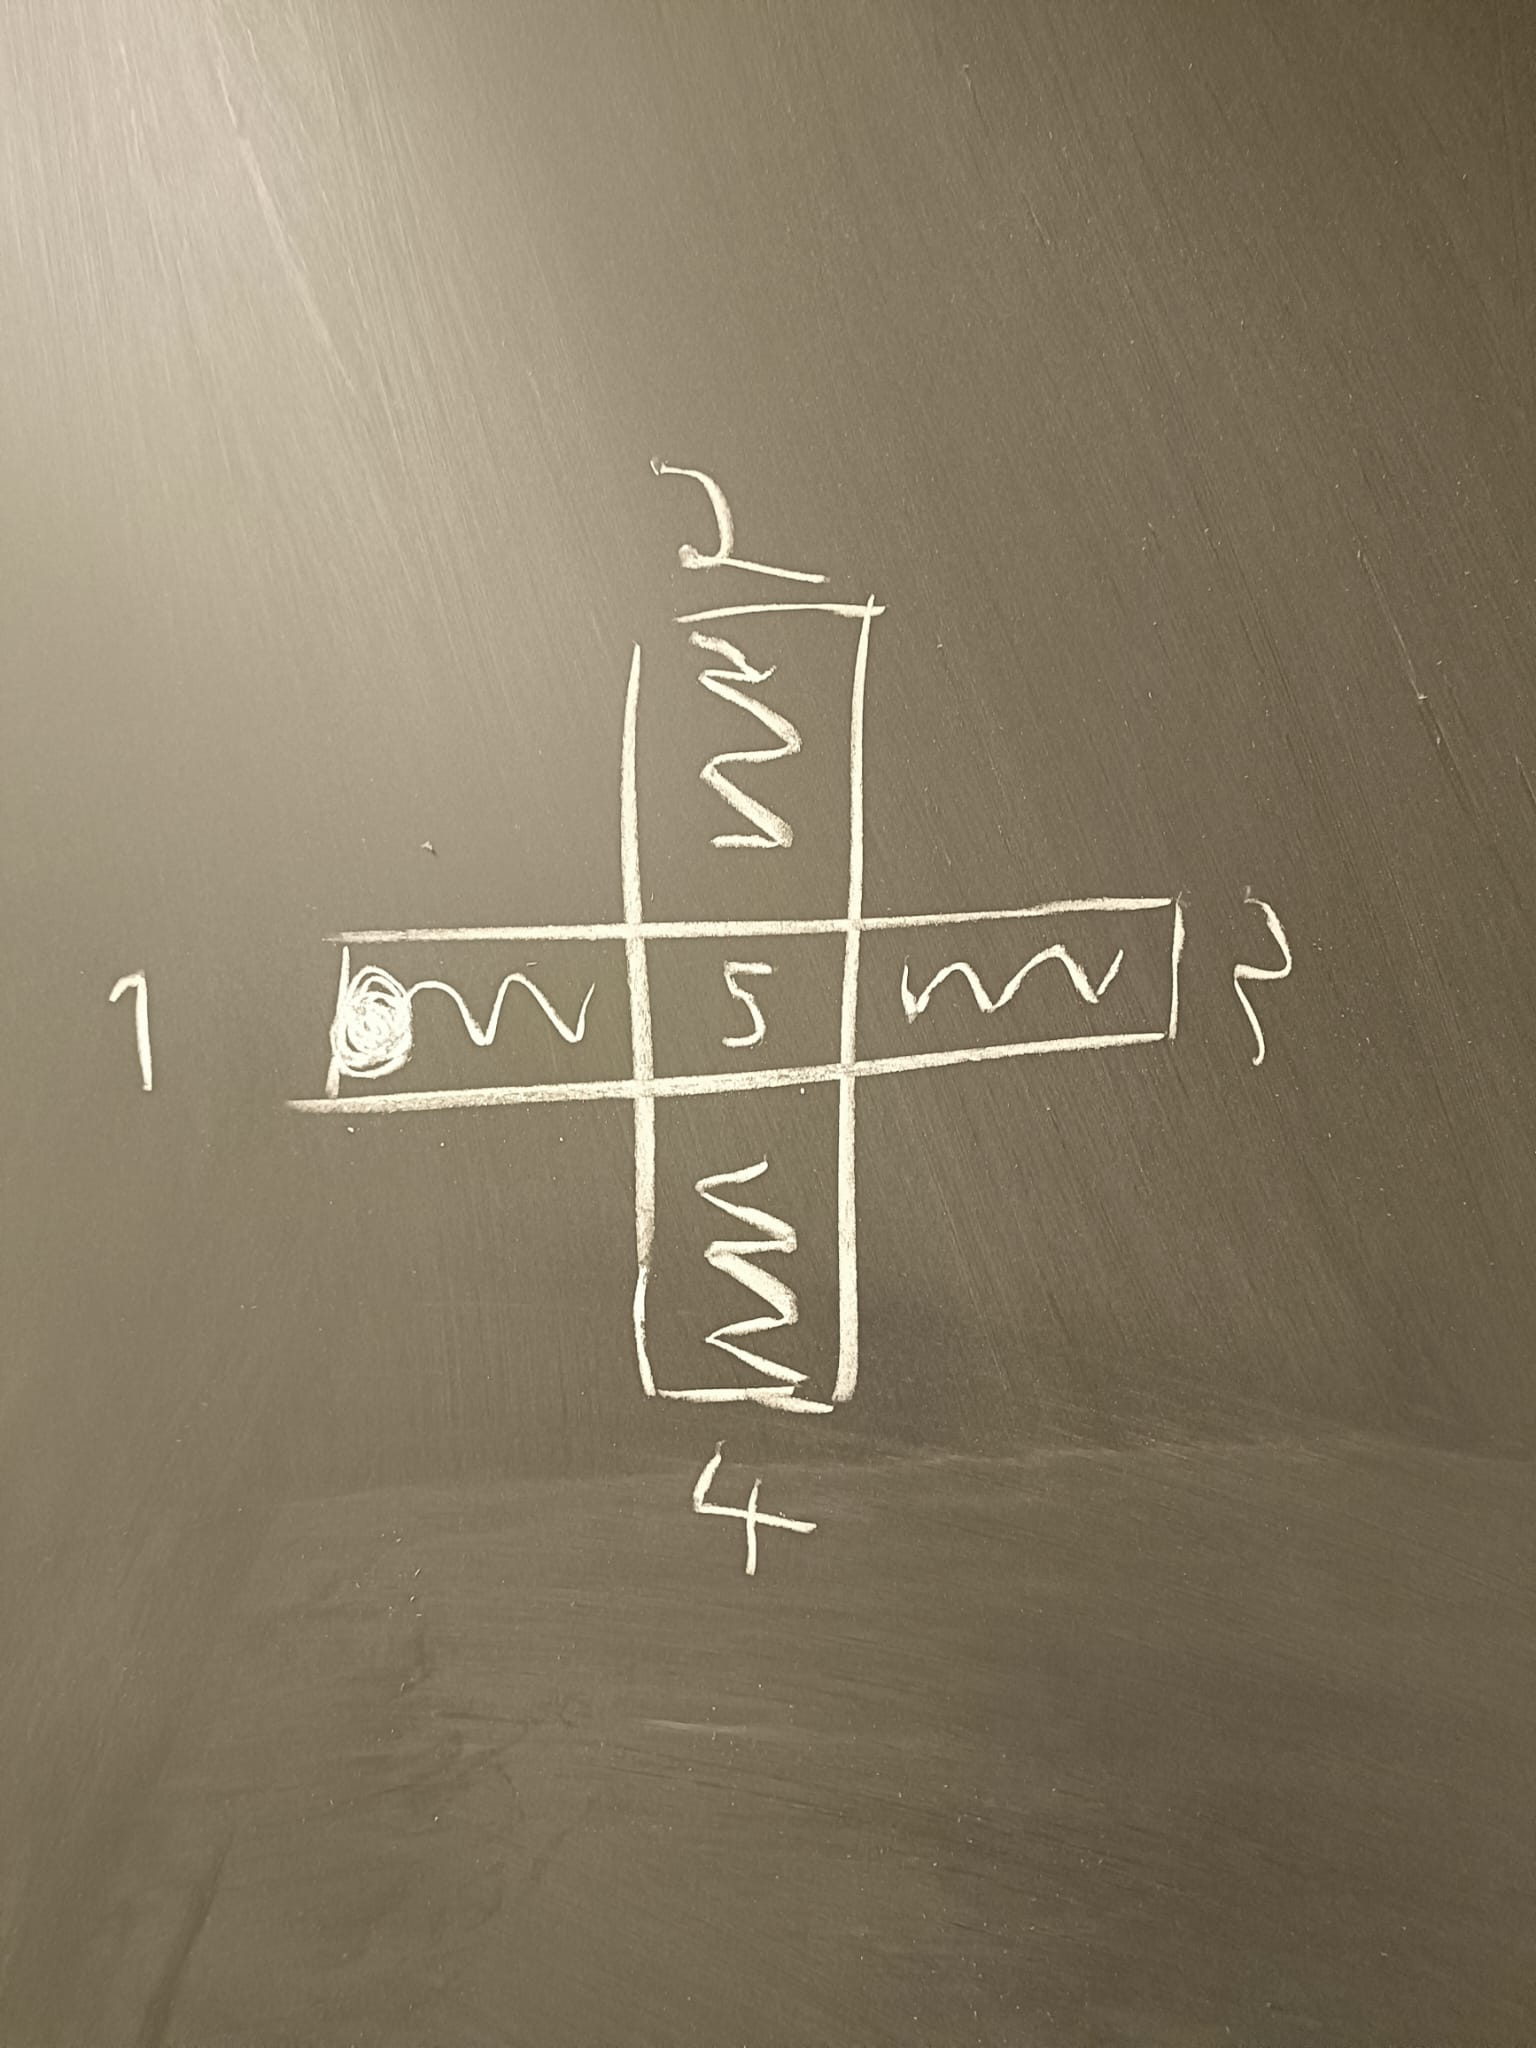
</div>

In [22]:
# # Build Incidence Matrices and vectors of edges

# EI, EJ, EIEJ_plots, DM, NE, NN = Matrixfuncs.build_incidence(Variabs)     
# Structure = Classes.Net_structure(EI, EJ, EIEJ_plots, DM, NE, NN)

In [23]:
## Initiate K matrix

# K, K_mat = Matrixfuncs.initiateK(NE, K_max)

In [24]:
## build network and plot structure

# NET = NETfuncs.buildNetwork(EIEJ_plots)
# pos_lattice = NETfuncs.plotNetStructure(NET, 'Cells')

In [25]:
## Identify edges at connections of cells and at boundaries for ease of use

# NConncetions = int(NGrid*(NGrid-1)*2)
# EdgesConnections = [int(i) for i in range(NE-NConncetions, NE)]

# NBoundaries = NGrid*4
# left_side = [0 + 4*NGrid*i for i in range(NGrid)]
# bottom_side = [1 + 4*i for i in range(NGrid)]
# right_side = [2 + 4*(NGrid-1) + 4*NGrid*i for i in range(NGrid)]
# top_side = [4*NGrid*(NGrid-1) + 3 + 4*i for i in range(NGrid)]
# EdgesBounaries = np.append(left_side, np.append(bottom_side, np.append(right_side, top_side)))
# # EdgesBounaries = np.array([], int)
# EdgesTotal = np.append(EdgesConnections, EdgesBounaries)

In [26]:
## Set up constraints for whole loop

# NodeData_full = array([[input_p], [input_p]])  # input p value
# # Nodes_full = array([[6], [35]])  # input p node
# Nodes_full = array([[input_output_pairs[i, 0]] for i in range(len(input_output_pairs))])  # input p node


# GroundNodes_full = array([[input_output_pairs[i, 1]] for i in range(len(input_output_pairs))])  # nodes with zero pressure
# GroundNodes_full_Allostery = array([GroundNodes_full[i][0] for i in range(len(GroundNodes_full))])

# EdgeData_full = array([[0], [0]])  # pressure drop value on edge

# # Edges_full = array([EdgesTotal[(EdgesTotal!=np.where(EI==Nodes_full[0])[0][0]) 
# #                                & (EdgesTotal!=np.where(EI==GroundNodes_full[0])[0][0]) 
# #                                & (EdgesTotal!=np.where(EI==GroundNodes_full[1])[0][0])], 
# #                     EdgesTotal[(EdgesTotal!=np.where(EI==Nodes_full[1])[0][0]) 
# #                                & (EdgesTotal!=np.where(EI==GroundNodes_full[0])[0][0]) 
# #                                & (EdgesTotal!=np.where(EI==GroundNodes_full[1])[0][0])]])

# # Edges_full_Allostery = array([EdgesTotal[(EdgesTotal!=np.where(EI==Nodes_full[0])[0][0]) 
# #                                          & (EdgesTotal!=np.where(EI==GroundNodes_full[0])[0][0]) 
# #                                          & (EdgesTotal!=np.where(EI==GroundNodes_full[1])[0][0])], 
# #                               EdgesTotal[(EdgesTotal!=np.where(EI==Nodes_full[1])[0][0]) 
# #                                          & (EdgesTotal!=np.where(EI==GroundNodes_full[0])[0][0]) 
# #                                          & (EdgesTotal!=np.where(EI==GroundNodes_full[1])[0][0])]])

# Edges_full = array([EdgesTotal[(EdgesTotal!=np.where(EJ==Nodes_full[0])[0][0]) 
#                                & (EdgesTotal!=np.where(EJ==GroundNodes_full[0])[0][0]) 
#                                & (EdgesTotal!=np.where(EJ==GroundNodes_full[1])[0][0])], 
#                     EdgesTotal[(EdgesTotal!=np.where(EJ==Nodes_full[1])[0][0]) 
#                                & (EdgesTotal!=np.where(EJ==GroundNodes_full[0])[0][0]) 
#                                & (EdgesTotal!=np.where(EJ==GroundNodes_full[1])[0][0])]])

# Edges_full_Allostery = array([EdgesTotal[(EdgesTotal!=np.where(EJ==Nodes_full[0])[0][0]) 
#                                          & (EdgesTotal!=np.where(EJ==GroundNodes_full[0])[0][0]) 
#                                          & (EdgesTotal!=np.where(EJ==GroundNodes_full[1])[0][0])], 
#                               EdgesTotal[(EdgesTotal!=np.where(EJ==Nodes_full[1])[0][0]) 
#                                          & (EdgesTotal!=np.where(EJ==GroundNodes_full[0])[0][0]) 
#                                          & (EdgesTotal!=np.where(EJ==GroundNodes_full[1])[0][0])]])

# # Edges_full = array([EdgesConnections, EdgesConnections])
# # output_edges = [np.where(np.append(EI, EJ)==GroundNodes_full[i])[0][0] % len(EI) for i in range(len(GroundNodes_full))]
# output_edges = np.array([np.where(np.append(EI, EJ)==GroundNodes_full[i])[0] % len(EI) 
#                          for i in range(len(GroundNodes_full))])

In [27]:
## Solve flow with no marbles, i.e. uniform high conductance, for normalization of flow

# u_final_noCond = zeros([2, 2])

# for i in range(2):
#     NodeData = NodeData_full[i] 
#     Nodes = Nodes_full[i] 
#     EdgeData = EdgeData_full[i]
#     Edges = Edges_full[i]
#     GroundNodes = array([GroundNodes_full[0][0], GroundNodes_full[1][0]])
    
#     Cstr_full, Cstr, f = Constraints.ConstraintMatrix(NodeData, Nodes, EdgeData, Edges, GroundNodes, NN, EI, EJ)  # As matrix

#     L, L_bar = Matrixfuncs.buildL(DM, K_mat, Cstr, NN)

#     p, u = Solve.Solve_flow(L_bar, EI, EJ, K, f)
    
#     # correct for very low velocities
#     u[abs(u)<10**-10] = 0

#     # NETfuncs.PlotNetwork(p, u, K, NET, pos_lattice, EIEJ_plots, NN, NE) 
        
#     # u_final_noCond[i,:] = u[output_edges]
#     u_final_noCond[i,:] = [np.sum(u[output_edges[0]]), np.sum(u[output_edges[1]])]

In [28]:
# def flow_iterate(iterations, NodeData, Nodes, EdgeData, Edges, GroundNodes, output_edges, DM, K_mat, NN, EI, EJ, flow_scheme, 
#                  sim_type='w marbles', plot='yes'):
    
#     u_final = zeros([2, 2])
#     u_all = np.zeros([NE, iterations])

#     for i in range(iterations):
#         m = i % 2

#         # this is the normal direction of flow

#         NodeData = NodeData_full[m] 
#         Nodes = Nodes_full[m] 
#         EdgeData = EdgeData_full[m]
#         Edges = Edges_full[m]
#         GroundNodes = GroundNodes_full[m]

#         # switch ground and input nodes every 2nd iteration 
#         if i % 4 > 1 and flow_scheme == 'taktak':
#             Nodes = GroundNodes_full[m] 
#             GroundNodes = Nodes_full[m]

#         # As matrix
#         Cstr_full, Cstr, f = Constraints.ConstraintMatrix(NodeData, Nodes, EdgeData, Edges, GroundNodes, NN, EI, EJ)  

#         for l in range(3):

#             L, L_bar = Matrixfuncs.buildL(DM, K_mat, Cstr, NN)

#             p, u = Solve.Solve_flow(L_bar, EI, EJ, K, f)

#             # correct for very low velocities
#             u[abs(u)<10**-10] = 0 
            
#             if sim_type == 'w marbles':
#                 K_nxt = Matrixfuncs.ChangeKFromFlow(u, u_thresh, K, K_max, K_min, NGrid)
#                 K_mat = np.eye(NE) * K_nxt
#                 K = copy.copy(K_nxt) 
        
#         if sim_type == 'Allostery test' or sim_type == 'no marbles':
#             u_final[i,:] = [np.sum(u[output_edges[0]]), np.sum(u[output_edges[1]])]
#         else:
#             # p_all[:, i] = p
#             u_all[:, i] = u

#         if plot == 'yes':
#             NETfuncs.PlotNetwork(p, u, K, NET, pos_lattice, EIEJ_plots, NN, NE) 
#     return u_final, u_all, K_mat

In [29]:
## Loop while changing conductivities

# u_all = np.zeros([NE, iterations])
# for i in range(iterations):
#     m = i % 2
    
#     # this is the normal direction of flow
    
#     NodeData = NodeData_full[m] 
#     Nodes = Nodes_full[m] 
#     EdgeData = EdgeData_full[m]
#     Edges = Edges_full[m]
#     GroundNodes = GroundNodes_full[m]
    
#     # switch ground and input nodes every 2nd iteration 
#     if i % 4 > 1 and flow_scheme == 'taktak':
#         Nodes = GroundNodes_full[m] 
#         GroundNodes = Nodes_full[m]
    
#     # As matrix
#     Cstr_full, Cstr, f = Constraints.ConstraintMatrix(NodeData, Nodes, EdgeData, Edges, GroundNodes, NN, EI, EJ)  
    
#     for l in range(3):

#         L, L_bar = Matrixfuncs.buildL(DM, K_mat, Cstr, NN)

#         p, u = Solve.Solve_flow(L_bar, EI, EJ, K, f)
        
#         # correct for very low velocities
#         u[abs(u)<10**-10] = 0

#         # NETfuncs.PlotNetwork(p, u, K, NET, pos_lattice, EIEJ_plots, NN, NE)

#         K_nxt = Matrixfuncs.ChangeKFromFlow(u, u_thresh, K, K_max, K_min, NGrid)
#         K_mat = np.eye(NE) * K_nxt
#         K = copy.copy(K_nxt)  
    
#     # p_all[:, i] = p
#     u_all[:, i] = u

In [30]:
## Allostery Check

# u_final_cond = zeros([2,2])

# for i in range(2):
#     NodeData = NodeData_full[i] 
#     Nodes = Nodes_full[i] 
#     EdgeData = EdgeData_full[i]
#     Edges = Edges_full_Allostery[i]
#     GroundNodes = GroundNodes_full_Allostery
    
#     Cstr_full, Cstr, f = Constraints.ConstraintMatrix(NodeData, Nodes, EdgeData, Edges, GroundNodes, NN, EI, EJ)  # As matrix

#     L, L_bar = Matrixfuncs.buildL(DM, K_mat, Cstr, NN)

#     p, u = Solve.Solve_flow(L_bar, EI, EJ, K, f)
    
#     # correct for very low velocities
#     u[abs(u)<10**-10] = 0

#     NETfuncs.PlotNetwork(p, u, K, NET, pos_lattice, EIEJ_plots, NN, NE)

#     # u_final_cond[i,:] = u[output_edges]
#     u_final_cond[i,:] = [np.sum(u[output_edges[0]]), np.sum(u[output_edges[1]])]